In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.decomposition import PCA
from scipy.linalg import svd

Introduces the scenario where, as inexperienced physicists, we measure a falling ball using an unconventional basis instead of the canonical basis [0, 1].

It then visualizes both the canonical basis vectors in red and the chosen hypothetical basis vectors in green to illustrate the difference in perspective.

The goal is to understand the impact of using different basis vectors on the measurement and analysis of physical phenomena.

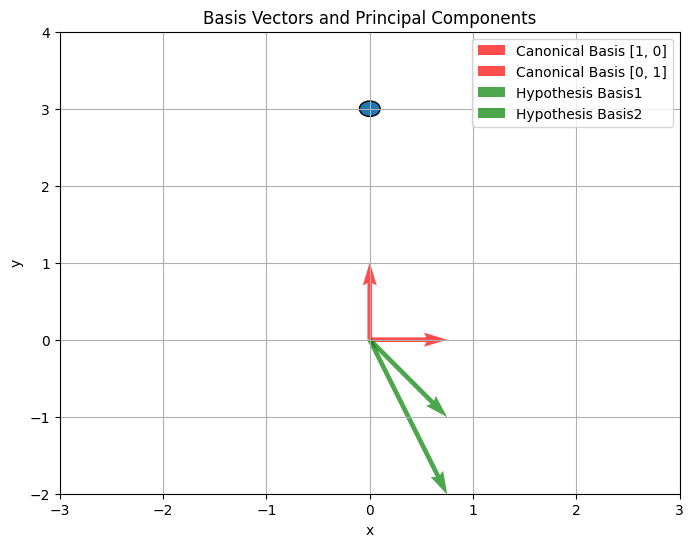

In [10]:
canonical_basis = np.array([[1, 0], [0, 1]])
hypothesis_basis = np.array([[1, -1], [1, -2]])

plt.figure(figsize=(8, 6))
circle = Circle((0, 3), 0.1, fill='red', edgecolor='black')
plt.gca().add_patch(circle)
plt.quiver(0, 0, canonical_basis[0, 0], canonical_basis[0, 1], color='r', scale=8, alpha=0.7, label='Canonical Basis [1, 0]')
plt.quiver(0, 0, canonical_basis[1, 0], canonical_basis[1, 1], color='r', scale=8, alpha=0.7, label='Canonical Basis [0, 1]')
plt.quiver(0, 0, hypothesis_basis[0, 0], hypothesis_basis[0, 1], color='g', scale=8, alpha=0.7, label='Hypothesis Basis1')
plt.quiver(0, 0, hypothesis_basis[1, 0], hypothesis_basis[1, 1], color='g', scale=8, alpha=0.7, label='Hypothesis Basis2')
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Basis Vectors and Principal Components')
plt.legend()
plt.grid(True)
plt.show()

**Defining the System and Transforming Measurements**

We define initial height (h0) under gravity (g).
We compute the ball's trajectory over time in the canonical basis, resulting in `x_canonical` and `y_canonical`.

To simulate the inexperienced physicist's perspective, we transform these canonical measurements to the hypothetical basis.

In [4]:
h0 = 100  # Initial height in meters
g = 9.81  # Acceleration due to gravity (m/s^2)
time_points = np.linspace(0, 4.5, 100)  # Simulate for 4.5 seconds

# Equations of motion in the canonical basis
x_canonical = np.zeros_like(time_points)
y_canonical = h0 - 0.5 * g * time_points**2
# Motion in hypothetical bases
hypothesis_basis_inverse = np.linalg.inv(hypothesis_basis)
measurements = np.dot(hypothesis_basis_inverse, np.vstack((x_canonical, y_canonical)))
x_hypothesis, y_hypothesis = measurements

**Visualizing the Motion in Canonical and Transformed Bases**

Visually compare the true motion of the falling ball in the canonical basis with the perceived motion in the hypothetical basis.

- *The left plot* shows the ball's true motion in terms of its x and y positions over time.

- *The right plot* displays the same motion as observed in the hypothetical basis, illustrating how the change in basis affects the perception of the trajectory.

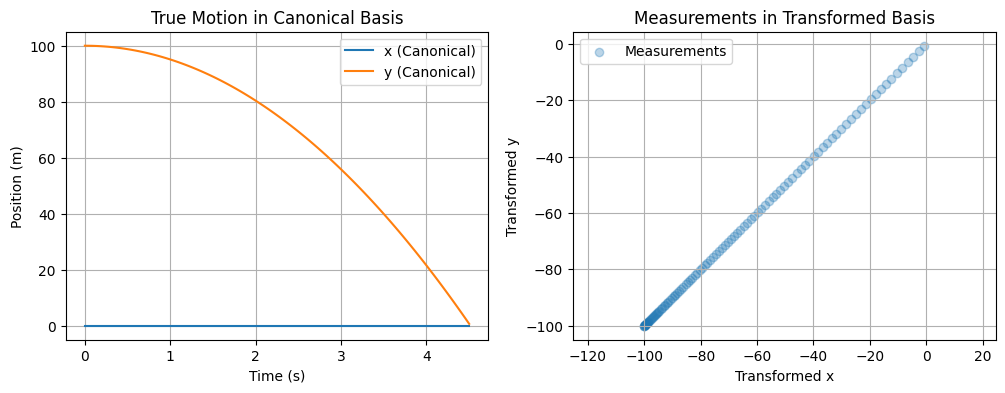

In [20]:
# Plot x_canonical and y_canonical (True motion in canonical basis)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time_points, x_canonical, label='x (Canonical)')
plt.plot(time_points, y_canonical, label='y (Canonical)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('True Motion in Canonical Basis')
plt.legend()
plt.grid(True)

# Plot measurements before PCA (In the transformed basis)
plt.subplot(1, 2, 2)
plt.scatter(x_hypothesis, y_hypothesis, alpha=0.3, marker='o', label='Measurements')
plt.xlabel('Transformed x')
plt.ylabel('Transformed y')
plt.title('Measurements in Transformed Basis')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**Applying PCA to Understand Variance in Measurements**

The physicists decide to apply Principal Component Analysis (PCA) to the measurements.

The first principal component (PC1) is extracted to explore the direction of maximum variance in the data, aiming to uncover underlying patterns or dominant directions of motion obscured by the initial choice of basis.

This step is critical for gaining insights into the true nature of the physical phenomenon under study, despite the initial measurement challenges.

In [6]:
# Perform PCA
pca = PCA(n_components=2)
data_for_pca = np.vstack((x_hypothesis, y_hypothesis)).T
pca.fit(data_for_pca)

# Principal components
pc1, pc2 = pca.components_
pc1, pc2

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))

**Visualizing Principal Components in Canonical Basis**

After identifying the principal components using PCA, this code block transforms PC1 and PC2 back into the canonical basis for visualization.

It highlights how PCA can reveal the underlying structure of the data, providing insights that guide more informed analyses despite initial measurement challenges.


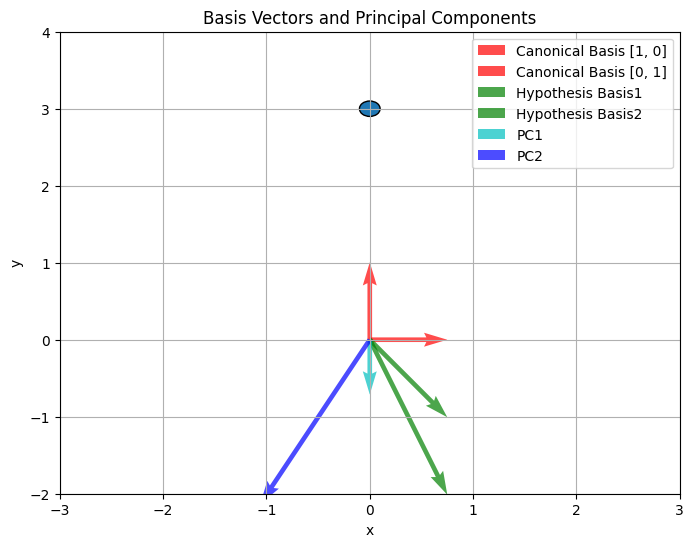

In [11]:
pc1, pc2 = pca.components_
pc1_canonical = np.dot(hypothesis_basis, pc1)
pc2_canonical = np.dot(hypothesis_basis, pc2)

plt.figure(figsize=(8, 6))
circle = Circle((0, 3), 0.1, fill='red', edgecolor='black')
plt.gca().add_patch(circle)
plt.quiver(0, 0, canonical_basis[0, 0], canonical_basis[0, 1], color='r', scale=8, alpha=0.7, label='Canonical Basis [1, 0]')
plt.quiver(0, 0, canonical_basis[1, 0], canonical_basis[1, 1], color='r', scale=8, alpha=0.7, label='Canonical Basis [0, 1]')
plt.quiver(0, 0, hypothesis_basis[0, 0], hypothesis_basis[0, 1], color='g', scale=8, alpha=0.7, label='Hypothesis Basis1')
plt.quiver(0, 0, hypothesis_basis[1, 0], hypothesis_basis[1, 1], color='g', scale=8, alpha=0.7, label='Hypothesis Basis2')
plt.quiver(0, 0, pc1_canonical[0], pc1_canonical[1], color='c', scale=8, alpha=0.7, label='PC1')
plt.quiver(0, 0, pc2_canonical[0], pc2_canonical[1], color='b', scale=8, alpha=0.7, label='PC2')
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Basis Vectors and Principal Components')
plt.legend()
plt.grid(True)
plt.show()